In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [50]:

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3, 1, 1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(3, 6, 3, 1, 1)
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv_trans1 = nn.ConvTranspose2d(6, 3, 4, 2, 1)
        self.conv_trans2 = nn.ConvTranspose2d(3, 1, 4, 2, 1)
        
    def forward(self, x):
        x = F.relu(self.pool1(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))        
        x = F.relu(self.conv_trans1(x))
        x = self.conv_trans2(x)
        return x


In [ ]:

dataset = datasets.MNIST(
    root='PATH',
    transform=transforms.ToTensor(),
    download=True
)
loader = DataLoader(
    dataset,
    num_workers=2,
    batch_size=8,
    shuffle=True
)

model = MyModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 1
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
        output = model(data)
        print(output.shape)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        
        print('Epoch {}, Batch idx {}, loss {}'.format(
            epoch, batch_idx, loss.item()))

In [52]:
model


MyModel(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_trans1): ConvTranspose2d(6, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv_trans2): ConvTranspose2d(3, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

In [12]:
torch.save(model.state_dict(), "./model_test.ph")
model.conv1.weight

Parameter containing:
tensor([[[[ 0.2304,  0.4801,  0.3362],
          [ 0.2245,  0.9336,  0.7478],
          [ 0.3032,  0.7283,  0.4510]]],


        [[[ 0.0559, -0.0926,  0.0033],
          [ 0.0604, -0.3442, -0.1813],
          [ 0.0742, -0.3692, -0.0370]]],


        [[[-0.2200, -0.2747,  0.2053],
          [ 0.0331,  0.1566, -0.3305],
          [ 0.1107,  0.0239, -0.3310]]]], requires_grad=True)

In [13]:
# Load model
loaded_model = MyModel()
# Model class must be defined somewhere
loaded_model.load_state_dict(torch.load("./model_test.ph"))
loaded_model.eval()


MyModel(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_trans1): ConvTranspose2d(6, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv_trans2): ConvTranspose2d(3, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

In [14]:
loaded_model.conv1.weight

Parameter containing:
tensor([[[[ 0.2304,  0.4801,  0.3362],
          [ 0.2245,  0.9336,  0.7478],
          [ 0.3032,  0.7283,  0.4510]]],


        [[[ 0.0559, -0.0926,  0.0033],
          [ 0.0604, -0.3442, -0.1813],
          [ 0.0742, -0.3692, -0.0370]]],


        [[[-0.2200, -0.2747,  0.2053],
          [ 0.0331,  0.1566, -0.3305],
          [ 0.1107,  0.0239, -0.3310]]]], requires_grad=True)

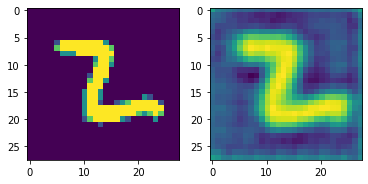

In [60]:

def normalize_output(img):
    img = img - img.min()
    img = img / img.max()
    return img

# Plot some images
idx = torch.randint(0, output.size(0), ())
pred = normalize_output(output[idx, 0])
img = data[idx, 0]

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(img.detach().numpy())
axarr[1].imshow(pred.detach().numpy())


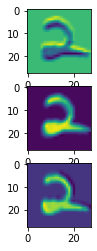

In [64]:
import random
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

#name_conv = "conv1" # conv_trans2
name_conv = "conv_trans1" # 
model.conv1.register_forward_hook(get_activation(name_conv))
data, _ = dataset[random.randint(0,60000)]
data.unsqueeze_(0)
output = model(data)

act = activation[name_conv].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([6, 3, 3, 3])


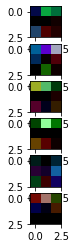

In [57]:
#kernels = model.conv1.weight.detach()
kernels = model.conv2.weight.detach()
print(kernels.size())
fig, axarr = plt.subplots(kernels.size(0))
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx].squeeze())

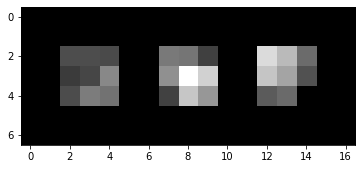

In [58]:


kernels = model.conv1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))

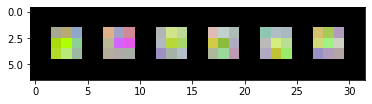

In [25]:
kernels = model.conv2.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))

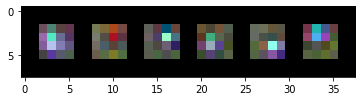

In [26]:
kernels = model.conv_trans1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))

torch.Size([3, 1, 4, 4])
torch.Size([3, 1, 4, 4])
torch.Size([3, 1, 4, 4])


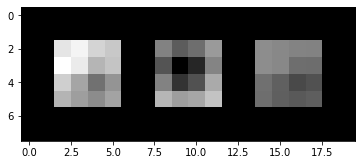

In [61]:
kernels = model.conv_trans2.weight.detach().clone()
print(kernels.shape)
kernels = kernels - kernels.min()
print(kernels.shape)
kernels = kernels / kernels.max()
print(kernels.shape)
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))

In [10]:
len(dataset)

60000

In [15]:
import torch.nn as nn
import torch
from torch import autograd
#network with 3 conv-and-deconv steps used in paper

     

class one_step_conv(nn.Module):
    """ Network with 5 layers of depth appying 1 convolution """
    def __init__(self, in_ch, out_ch):
        super(one_step_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )   
    

    def forward(self, x):
        conv = self.conv(x)
        #print(f"Shape for internal conv {conv.shape}")
        return conv

class UnetExample(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(UnetExample, self).__init__()
        # Downsampling        
        self.conv_down_1 = one_step_conv(1, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.conv_down_2 = one_step_conv(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.conv_down_3 = one_step_conv(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.conv_down_4 = one_step_conv(256, 512)
        self.pool4 = nn.MaxPool2d(2)
        self.conv_down_5 = one_step_conv(512, 1024)
        self.pool5 = nn.MaxPool2d(2)
        
        self.conv_bottom = one_step_conv(1024, 2048)
        
        # Upsampling        
        self.upsample_1 = nn.ConvTranspose2d(2048, 1024, 2, stride=2)
        self.conv_up_1 = one_step_conv(2048, 1024)
        self.upsample_2 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.conv_up_2 = one_step_conv(1024, 512)
        self.upsample_3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv_up_3 = one_step_conv(512, 256)
        self.upsample_4 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv_up_4 = one_step_conv(256, 128)
        self.upsample_5 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv_up_5 = one_step_conv(128, 64)

        self.conv_out = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        ###down########
        down_1 = self.conv_down_1(x)
        pool_1 = self.pool1(down_1)
        #print(f"down_1 : {down_1.shape} pool_1: {pool_1.shape}")

        down_2 = self.conv_down_2(pool_1)
        pool_2 = self.pool2(down_2)
        #print(f"down_2 : {down_2.shape} pool_2: {pool_2.shape}")

        down_3 = self.conv_down_3(pool_2)
        pool_3 = self.pool3(down_3)
        #print(f"down_3 : {down_3.shape} pool_3: {pool_3.shape}")

        down_4 = self.conv_down_4(pool_3)
        pool_4 = self.pool4(down_4)
        #print(f"down_4 : {down_4.shape} pool_4: {pool_4.shape}")

        down_5 = self.conv_down_5(pool_4)
        pool_5 = self.pool5(down_5)
        #print(f"down_5 : {down_5.shape} pool_5: {pool_5.shape}")

        bottom = self.conv_bottom(pool_5)
        #print(f"bottom : {bottom.shape}")

        up_1 = self.upsample_1(bottom)
        merge1 = torch.cat([up_1, down_5], dim=1)
        up_1_out = self.conv_up_1(merge1)
        #print(f"up_1 : {up_1.shape} merge1: {merge1.shape} up_1_out: {up_1_out.shape}")

        up_2 = self.upsample_2(up_1_out)
        merge2 = torch.cat([up_2, down_4], dim=1)
        up_2_out = self.conv_up_2(merge2)
       # print(f"up_2 : {up_2.shape} merge2: {merge2.shape} up_2_out: {up_2_out.shape}")

        up_3 = self.upsample_3(up_2_out)
        merge3 = torch.cat([up_3, down_3], dim=1)
        up_3_out = self.conv_up_3(merge3)
        #print(f"up_3 : {up_3.shape} merge3: {merge3.shape} up_3_out: {up_3_out.shape}")

        up_4 = self.upsample_4(up_3_out)        
        merge4 = torch.cat([up_4, down_2], dim=1)        
        up_4_out = self.conv_up_4(merge4)
        #print(f"up_4 : {up_4.shape} merge4: {merge4.shape} up_4_out: {up_4_out.shape}")

        up_5 = self.upsample_5(up_4_out)
        merge5 = torch.cat([up_5, down_1], dim=1)
        up_5_out = self.conv_up_5(merge5)
         #print(f"up_5 : {up_5.shape} merge5: {merge5.shape} up_5_out: {up_5_out.shape}")

        end_out = self.conv_out(up_5_out)
        #out = nn.Sigmoid()(end_out)
        #out = nn.Sigmoid(end_out)

        return end_out


In [ ]:
n = 512
x = torch.rand((1,1,n,n))
y = torch.rand(1,1,n,n)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)



epochs = 1
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
                
        model2 = UnetExample(in_ch=1, out_ch=1)
        output = model2(x)
        print(output.shape)

        #output = model(data)
        #print(output.shape)
        loss = criterion(output, x)
        loss.backward()
        optimizer.step()
        
        print('Epoch {}, Batch idx {}, loss {}'.format(
            epoch, batch_idx, loss.item()))

In [ ]:
model2

In [ ]:
kernels = model2.conv_down_1.conv[0].weight.detach().clone()
print(kernels.shape)
print(kernels.size(0))
kernesl = kernels.size(0)
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))


In [ ]:
kernels = model2.conv_down_2.conv[0].weight.detach().clone()
print(type(model2.conv_down_2.conv[0]))
print(kernels.shape)
print(kernels.size(0))
kernesl = kernels.size(0)
print(kernels)
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))


In [65]:
from monai.networks.nets.attentionunet import AttentionUnet
import matplotlib.pyplot as plt
import os
# load models

def loadModel(file):
    #file="../validation/AttentionUnet_Adam_2022-08-03.pt"
    print(f"Load model from {file}")
    model_dict = {}
    device = "cuda" if torch.cuda.is_available() else "cpu"
    checkpoint = torch.load(file)
    return checkpoint

for file in os.listdir("../validation/"):    
    if ".pt" in file:
        print(file)
        folder = f"../validation/{file}"
        checkpoint = loadModel(folder) 
        break      
    

# instantiate the model
model = AttentionUnet(spatial_dims=2,
                        in_channels=1, 
                        out_channels=1,
                        channels=(64, 128, 256),
                        strides=(2, 2)
                        )



AttentionUnet_Adam_2022-08-03.pt
Load model from ../validation/AttentionUnet_Adam_2022-08-03.pt


In [66]:
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

AttentionUnet(
  (model): Sequential(
    (0): ConvBlock(
      (conv): Sequential(
        (0): Convolution(
          (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (adn): ADN(
            (N): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): ReLU()
          )
        )
        (1): Convolution(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (adn): ADN(
            (N): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): ReLU()
          )
        )
      )
    )
    (1): AttentionLayer(
      (attention): AttentionBlock(
        (W_g): Sequential(
          (0): Convolution(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine

torch.Size([64, 1, 3, 3])
tensor([[[-0.1010, -0.1401,  0.3145],
         [-0.4806, -0.3520,  0.2870],
         [ 0.0195,  0.2466,  0.1365]]])
64


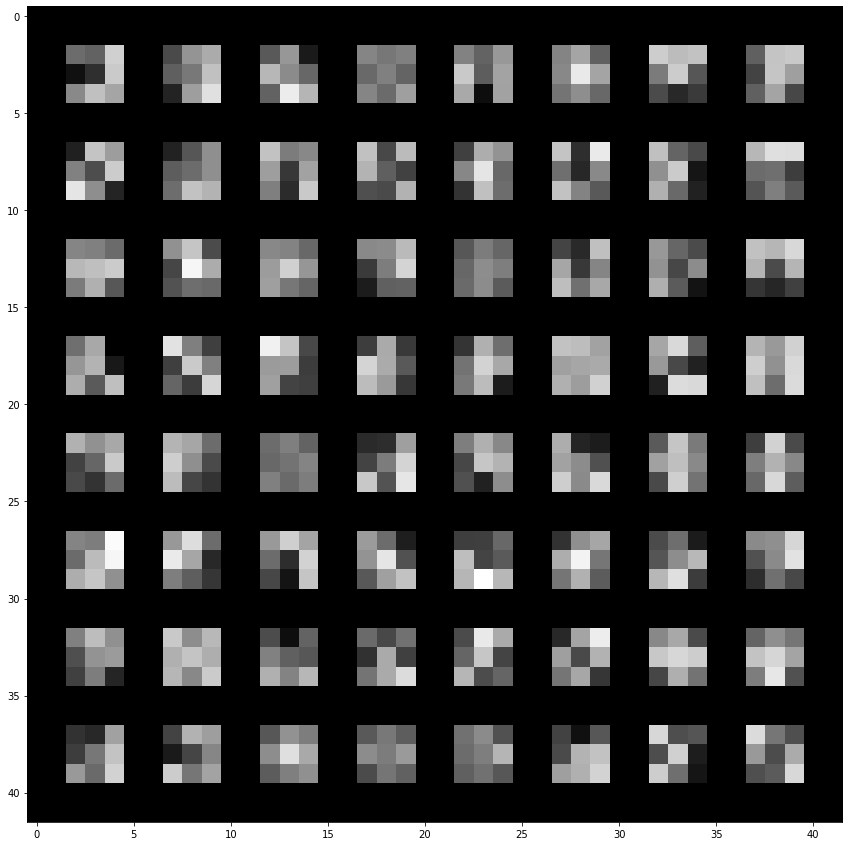

In [67]:
from torchvision.utils import make_grid
kernels = model.model[0].conv[0].conv.weight.detach().clone()
print(kernels.shape)
print(kernels[0,:,:,:])
print(kernels.size(0))
kernesl = kernels.size(0)
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
fig, ax = plt.subplots(figsize=(20, 15))
plt.imshow(img.permute(1, 2, 0))


In [82]:
IMAGE_WIDTH  = IMAGE_HEIGHT = 224
from torchvision.transforms import transforms
import torchvision.transforms.functional as TF

class CustomTestStrokTrans(torch.nn.Module):
    def __init__(self):
       super().__init__()

    def __call__(self, img, mask=None):

        
        #t = random.choice(self.transforms)
        image = transforms.Grayscale()(img)
        if mask is not None:
            seg = transforms.Grayscale()(mask)
        
        # Adjusting gamma
        image = TF.adjust_gamma(img=image, gamma=1)
        image = TF.adjust_contrast(image,2)               
            
        # Resize
        image = transforms.Resize((IMAGE_WIDTH,IMAGE_HEIGHT))(image)
        if mask is not None:
            seg = transforms.Resize((IMAGE_WIDTH,IMAGE_HEIGHT))(seg)

        # To tensor
        image =  transforms.ToTensor()(image)
        if mask is not None:
            seg =  transforms.ToTensor()(seg)
            
        return image, (seg if mask is not None else None)


In [87]:
import random
from PIL import Image
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

#name_conv = "conv1" # conv_trans2
name_conv = "conv" # 
model.model[0].conv[0].register_forward_hook(get_activation(name_conv))


### Load the data of a patient and infer it with the model
patient = "../dataset/test/images/sub-r040s086_ses/0121.png"
mask = "../dataset/test/masks/sub-r040s086_ses_mask/0121.png"



# apply transform to image
trans = CustomTestStrokTrans()
img, msk  = trans(Image.open(patient), Image.open(mask))
img = torch.unsqueeze(img,dim=0)
msk = torch.unsqueeze(msk,dim=0)
#img = torch.ones(4,1,224,224).float().to(device)
#msk = torch.ones(4,1,224,224).float().to(device)
img = img.float()
msk = msk.float()
print(img.shape)
print(msk.shape)

#data, _ = dataset[random.randint(0,60000)]
output = model(img)

torch.Size([1, 1, 224, 224])
torch.Size([1, 1, 224, 224])


In [108]:
import torchvision
#act = activation[name_conv].squeeze()
act = activation[name_conv][0,0:10,:,:]

results = []
for i in range(act.size(0)):
    results.append( torch.unsqueeze(act[i], dim=0))


#act = activation[name_conv][0,0:5,:,:].squeeze()
#fig, axarr = plt.subplots()
#for idx in range(act.size(0)):
#for idx in range(act.size(0)):
#    axarr[idx].imshow(act[idx])

# result = torch.cat((results), dim=0)
# grid = torchvision.utils.make_grid(act, nrow=act.size(0), padding=100)
# torchvision.utils.save_image(grid, '../validation/sample.png') 

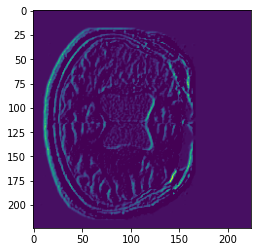

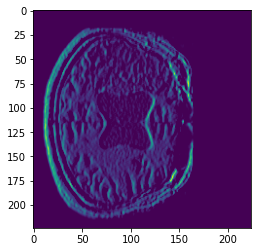

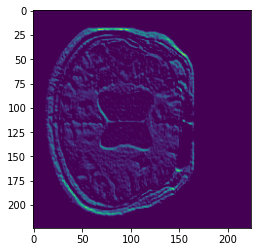

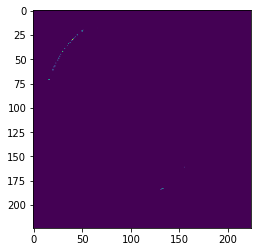

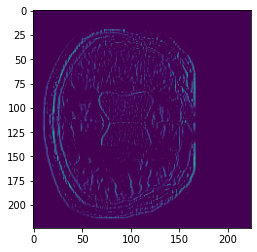

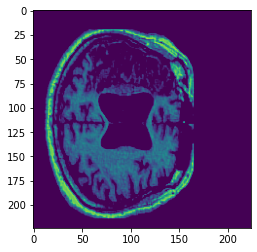

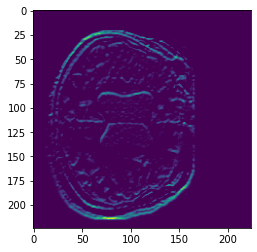

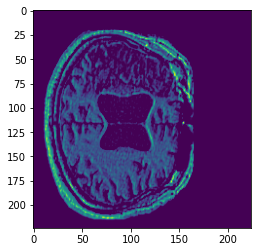

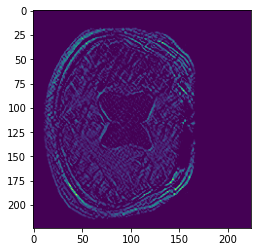

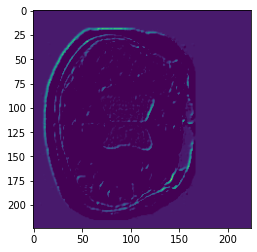

In [109]:
#model.model[0].conv[0].conv
#activation[name_conv].shape
#act.size()
for i in range(len(results)):
    plt.imshow(results[i][0,:,:])
    plt.show()